# K-Means Clustering Analysis - CardWise Credit Card Customers

**Objective:** Segment credit card customers into distinct groups based on their spending behavior and characteristics.

---

## Phase A: Data Loading & Initial Exploration

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [101]:
# Load the dataset
df = pd.read_csv('Customer Data.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 8950 rows, 18 columns


### 1. Display first few rows

In [102]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


### 2. Dataset Information

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 3. Statistical Summary

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### 4. Check for Missing Values

In [105]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found!")


⚠️ Columns with missing values:
          Column  Missing Count  Percentage
MINIMUM_PAYMENTS            313    3.497207
    CREDIT_LIMIT              1    0.011173


### 5. Visualize Missing Values

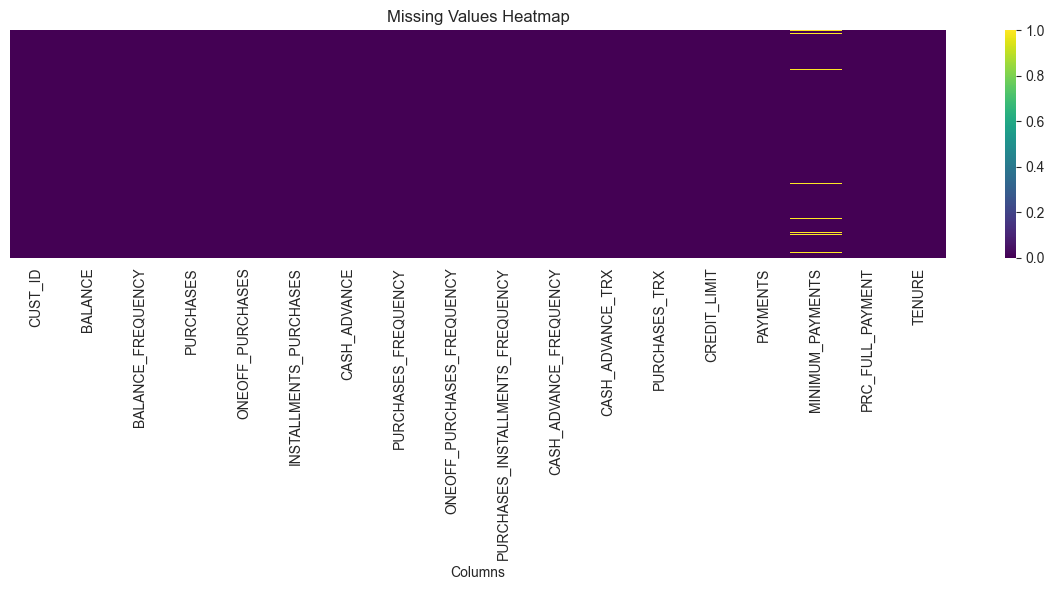

In [106]:
# Visual representation of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

### 6. Handle Missing Values - Median Imputation

**Decision:** Fill missing values with median (robust to outliers in financial data)

In [107]:
# Calculate medians for missing values
median_min_payments = df["MINIMUM_PAYMENTS"].median()
median_credit_limit = df["CREDIT_LIMIT"].median()

print(f"Median MINIMUM_PAYMENTS: {median_min_payments:.2f}")
print(f"Median CREDIT_LIMIT: {median_credit_limit:.2f}")

# Fill missing values with median
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(median_min_payments)
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(median_credit_limit)

# Verify no missing values remain
total_missing = df.isnull().sum().sum()
print(f"Total missing values after imputation: {total_missing}")

if total_missing == 0:
    print("SUCCESS: All missing values handled!")

Median MINIMUM_PAYMENTS: 312.34
Median CREDIT_LIMIT: 3000.00
Total missing values after imputation: 0
SUCCESS: All missing values handled!


---

## Phase B: Exploratory Data Analysis (EDA)

### 1. Correlation Matrix - Key Financial Features

Correlation Matrix:
              BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS
BALANCE         1.000      0.181         0.497         0.531     0.323
PURCHASES       0.181      1.000        -0.051         0.357     0.603
CASH_ADVANCE    0.497     -0.051         1.000         0.304     0.453
CREDIT_LIMIT    0.531      0.357         0.304         1.000     0.422
PAYMENTS        0.323      0.603         0.453         0.422     1.000


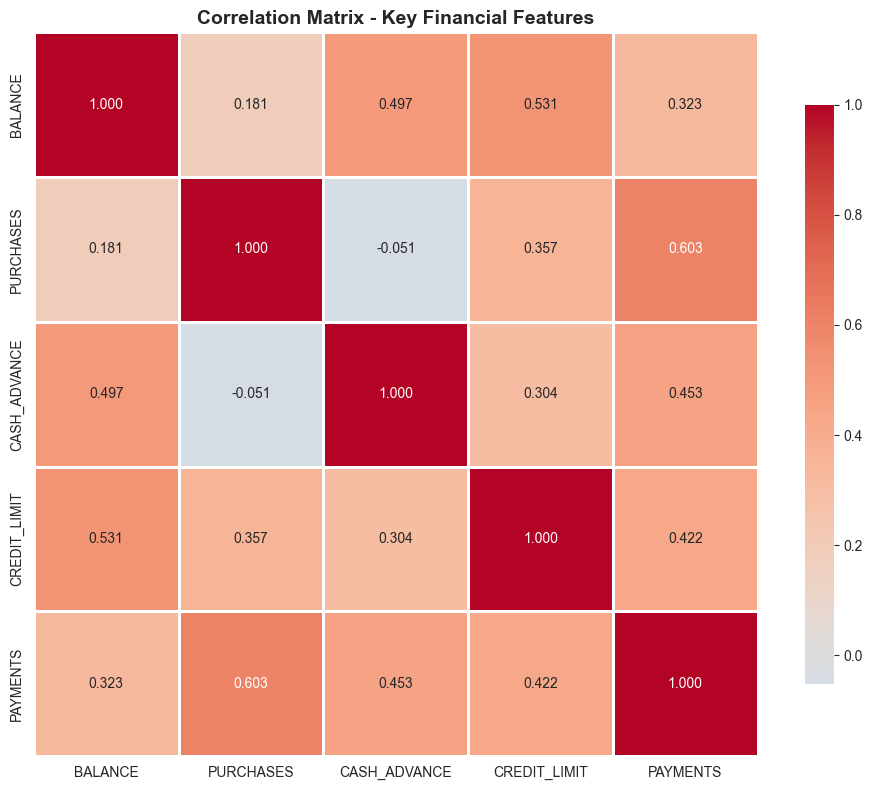


Key Insights:
- PURCHASES vs PAYMENTS: Strong positive correlation (0.603)
- BALANCE vs CREDIT_LIMIT: Moderate positive correlation (0.531)
- PURCHASES vs CASH_ADVANCE: Nearly zero correlation (-0.051) - distinct behaviors!


In [108]:
# Calculate correlation matrix for key features
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
correlation_matrix = df[key_features].corr()

print('Correlation Matrix:')
print(correlation_matrix.round(3))

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Key Financial Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/01_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print('\nKey Insights:')
print('- PURCHASES vs PAYMENTS: Strong positive correlation (0.603)')
print('- BALANCE vs CREDIT_LIMIT: Moderate positive correlation (0.531)')
print('- PURCHASES vs CASH_ADVANCE: Nearly zero correlation (-0.051) - distinct behaviors!')

### 2. Distribution Analysis - BALANCE and PURCHASES

Understanding data distribution helps identify skewness, outliers, and patterns.

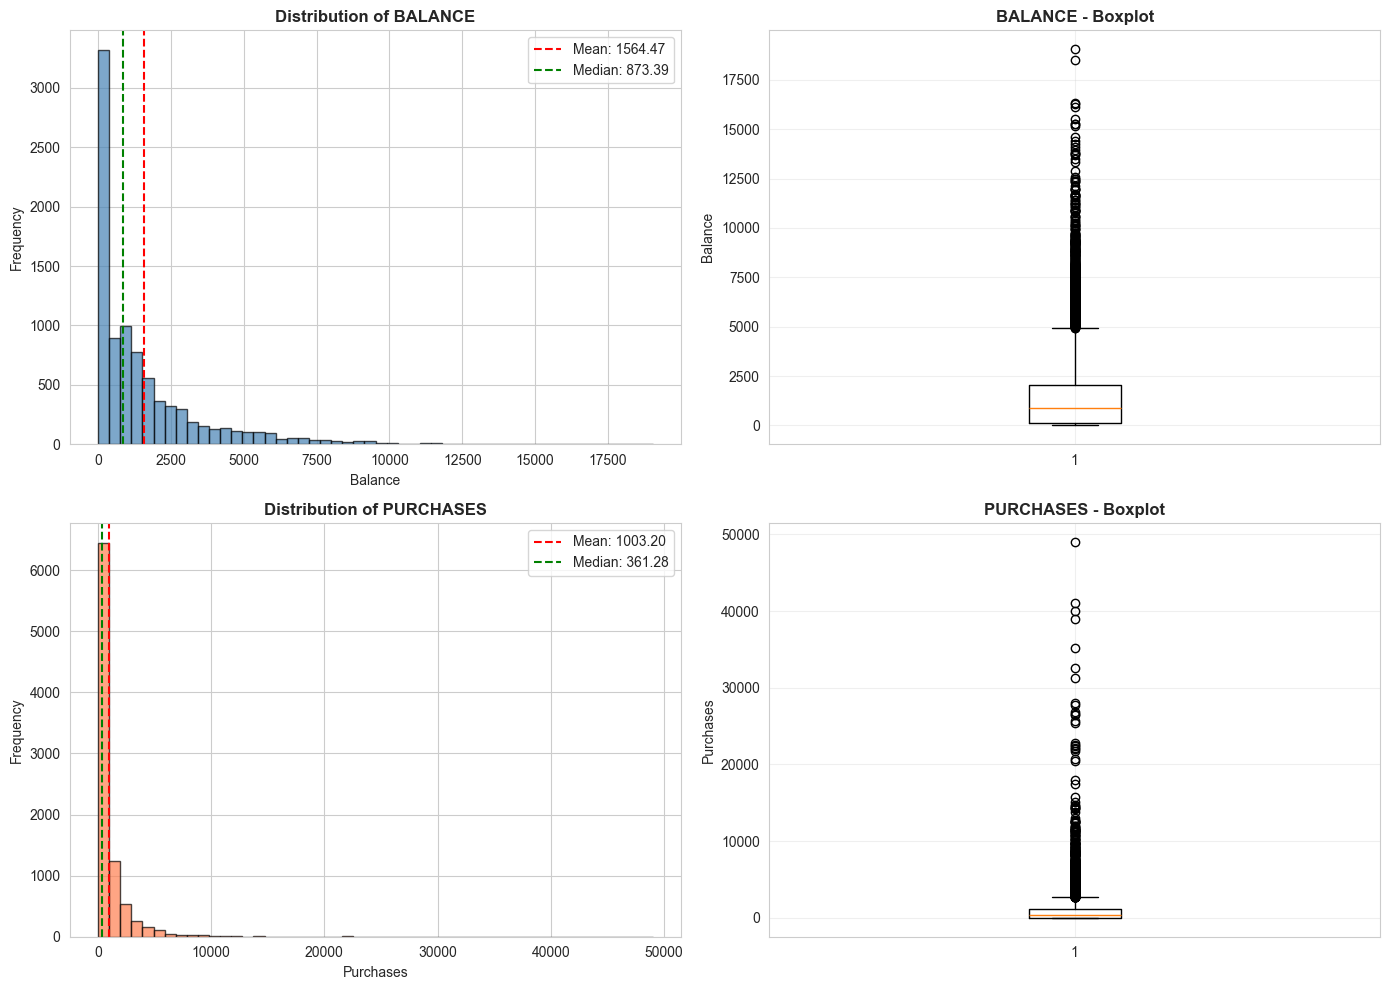

BALANCE Statistics:
  Mean: 1564.47
  Median: 873.39
  Std Dev: 2081.53
  Skewness: 2.39 (Right-skewed)

PURCHASES Statistics:
  Mean: 1003.20
  Median: 361.28
  Std Dev: 2136.63
  Skewness: 8.14 (Heavily right-skewed!)


In [109]:
# Create distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BALANCE histogram
axes[0, 0].hist(df['BALANCE'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of BALANCE', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Balance')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['BALANCE'].mean(), color='red', linestyle='--', label=f"Mean: {df['BALANCE'].mean():.2f}")
axes[0, 0].axvline(df['BALANCE'].median(), color='green', linestyle='--', label=f"Median: {df['BALANCE'].median():.2f}")
axes[0, 0].legend()

# BALANCE boxplot
axes[0, 1].boxplot(df['BALANCE'], vert=True)
axes[0, 1].set_title('BALANCE - Boxplot', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Balance')
axes[0, 1].grid(True, alpha=0.3)

# PURCHASES histogram
axes[1, 0].hist(df['PURCHASES'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of PURCHASES', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Purchases')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['PURCHASES'].mean(), color='red', linestyle='--', label=f"Mean: {df['PURCHASES'].mean():.2f}")
axes[1, 0].axvline(df['PURCHASES'].median(), color='green', linestyle='--', label=f"Median: {df['PURCHASES'].median():.2f}")
axes[1, 0].legend()

# PURCHASES boxplot
axes[1, 1].boxplot(df['PURCHASES'], vert=True)
axes[1, 1].set_title('PURCHASES - Boxplot', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Purchases')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/02_distributions_balance_purchases.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"BALANCE Statistics:")
print(f"  Mean: {df['BALANCE'].mean():.2f}")
print(f"  Median: {df['BALANCE'].median():.2f}")
print(f"  Std Dev: {df['BALANCE'].std():.2f}")
print(f"  Skewness: {df['BALANCE'].skew():.2f} (Right-skewed)")

print(f"\nPURCHASES Statistics:")
print(f"  Mean: {df['PURCHASES'].mean():.2f}")
print(f"  Median: {df['PURCHASES'].median():.2f}")
print(f"  Std Dev: {df['PURCHASES'].std():.2f}")
print(f"  Skewness: {df['PURCHASES'].skew():.2f} (Heavily right-skewed!)")

### 3. Scatter Plot - PURCHASES vs CASH_ADVANCE

Exploring the relationship between purchases and cash advances to identify customer behavior patterns.

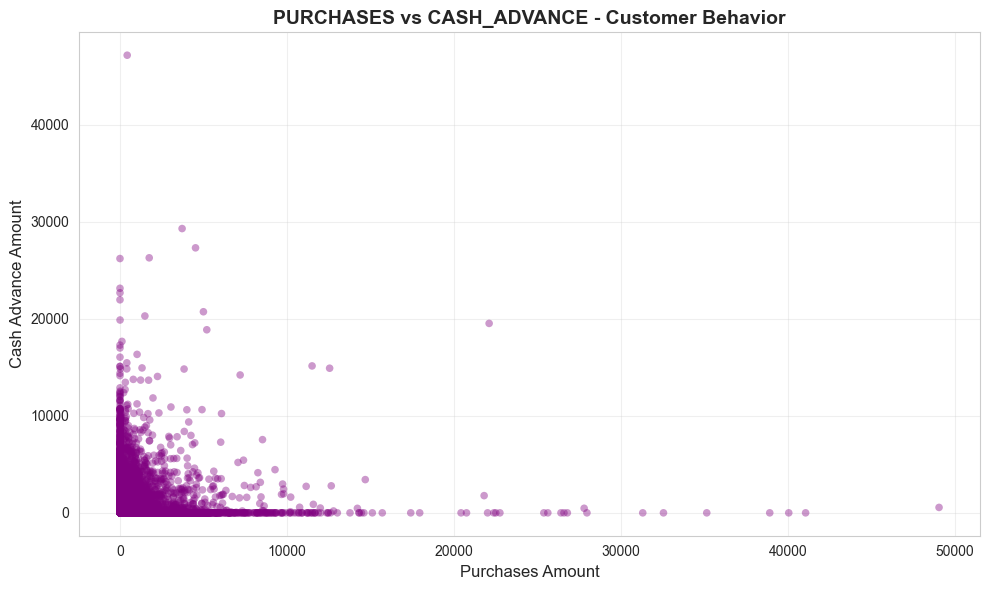

Correlation between PURCHASES and CASH_ADVANCE: -0.051

Insight: Near-zero correlation suggests distinct customer segments:
  - Shoppers (high purchases, low cash advance)
  - Cash-seekers (low purchases, high cash advance)
  - Inactive users (low on both)
  - Heavy users (high on both)


In [110]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PURCHASES'], df['CASH_ADVANCE'], alpha=0.4, s=30, c='purple', edgecolors='none')
plt.title('PURCHASES vs CASH_ADVANCE - Customer Behavior', fontsize=14, fontweight='bold')
plt.xlabel('Purchases Amount', fontsize=12)
plt.ylabel('Cash Advance Amount', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/03_scatter_purchases_vs_cashadvance.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate correlation
corr = df['PURCHASES'].corr(df['CASH_ADVANCE'])
print(f"Correlation between PURCHASES and CASH_ADVANCE: {corr:.3f}")
print('\nInsight: Near-zero correlation suggests distinct customer segments:')
print('  - Shoppers (high purchases, low cash advance)')
print('  - Cash-seekers (low purchases, high cash advance)')
print('  - Inactive users (low on both)')
print('  - Heavy users (high on both)')

### 4. Outlier Detection - CASH_ADVANCE and CREDIT_LIMIT

Using boxplots and IQR method to identify outliers.

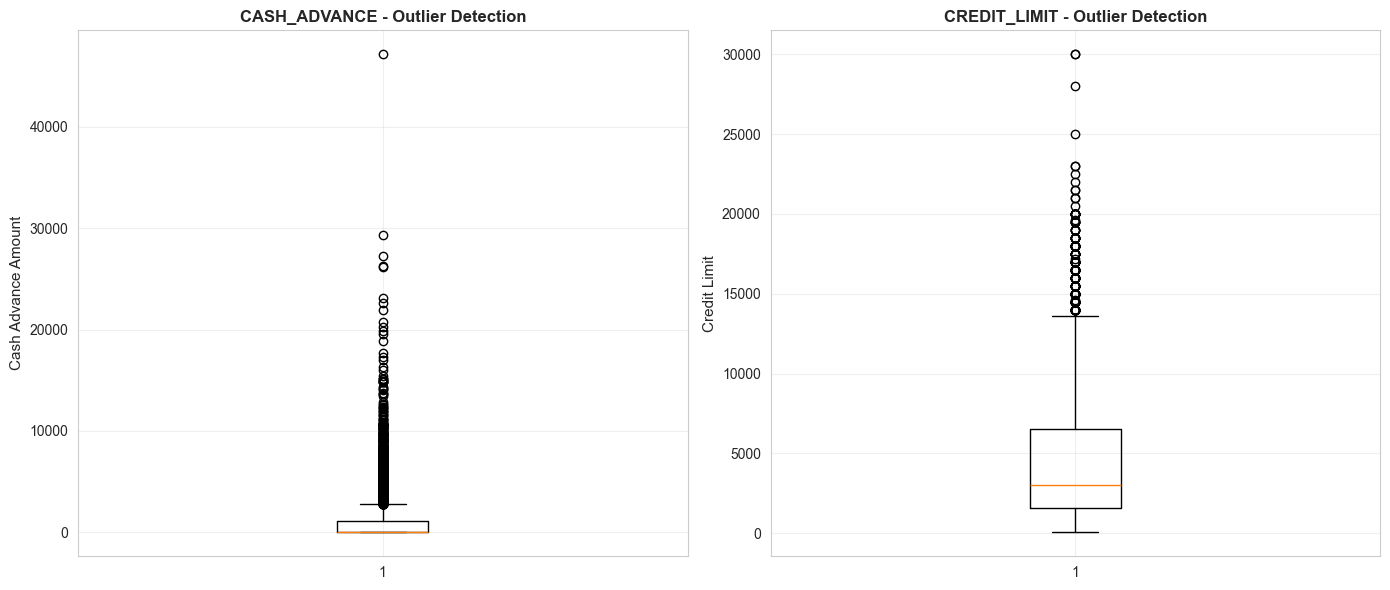

CASH_ADVANCE Outlier Analysis:
  Q1: 0.00
  Q3: 1113.82
  IQR: 1113.82
  Upper Bound: 2784.55
  Number of outliers: 1030 (11.51%)

CREDIT_LIMIT Outlier Analysis:
  Q1: 1600.00
  Q3: 6500.00
  IQR: 4900.00
  Upper Bound: 13850.00
  Number of outliers: 248 (2.77%)

Decision: KEEP outliers - they may represent important customer segments (VIP, high-risk, etc.)


In [111]:
# Create boxplots for outlier detection
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# CASH_ADVANCE boxplot
axes[0].boxplot(df['CASH_ADVANCE'], vert=True)
axes[0].set_title('CASH_ADVANCE - Outlier Detection', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cash Advance Amount', fontsize=11)
axes[0].grid(True, alpha=0.3)

# CREDIT_LIMIT boxplot
axes[1].boxplot(df['CREDIT_LIMIT'], vert=True)
axes[1].set_title('CREDIT_LIMIT - Outlier Detection', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Credit Limit', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/04_outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Detect outliers using IQR method
def detect_outliers(column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return len(outliers), lower_bound, upper_bound, Q1, Q3, IQR

print('CASH_ADVANCE Outlier Analysis:')
outliers_ca, lower_ca, upper_ca, q1_ca, q3_ca, iqr_ca = detect_outliers('CASH_ADVANCE')
print(f"  Q1: {q1_ca:.2f}")
print(f"  Q3: {q3_ca:.2f}")
print(f"  IQR: {iqr_ca:.2f}")
print(f"  Upper Bound: {upper_ca:.2f}")
print(f"  Number of outliers: {outliers_ca} ({outliers_ca/len(df)*100:.2f}%)")

print('\nCREDIT_LIMIT Outlier Analysis:')
outliers_cl, lower_cl, upper_cl, q1_cl, q3_cl, iqr_cl = detect_outliers('CREDIT_LIMIT')
print(f"  Q1: {q1_cl:.2f}")
print(f"  Q3: {q3_cl:.2f}")
print(f"  IQR: {iqr_cl:.2f}")
print(f"  Upper Bound: {upper_cl:.2f}")
print(f"  Number of outliers: {outliers_cl} ({outliers_cl/len(df)*100:.2f}%)")

print('\nDecision: KEEP outliers - they may represent important customer segments (VIP, high-risk, etc.)')

---

## Phase C: Feature Selection and Preprocessing

### 1. Select Features for Clustering

**Decision:** Use Financial + Behavioral features for richer customer profiles

In [112]:
# Select features: Financial amounts + Behavioral frequencies
selected_features = [
    # Financial features
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    # Behavioral features
    'PURCHASES_FREQUENCY',
    'PURCHASES_TRX',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PRC_FULL_PAYMENT'
]

print(f"Selected {len(selected_features)} features for clustering:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

# Create feature matrix
X = df[selected_features]
print(f"\nFeature matrix shape: {X.shape}")

Selected 13 features for clustering:
  1. BALANCE
  2. PURCHASES
  3. ONEOFF_PURCHASES
  4. INSTALLMENTS_PURCHASES
  5. CASH_ADVANCE
  6. CREDIT_LIMIT
  7. PAYMENTS
  8. MINIMUM_PAYMENTS
  9. PURCHASES_FREQUENCY
  10. PURCHASES_TRX
  11. CASH_ADVANCE_FREQUENCY
  12. CASH_ADVANCE_TRX
  13. PRC_FULL_PAYMENT

Feature matrix shape: (8950, 13)


### 2. Feature Scaling - StandardScaler

Standardizing features to have mean=0 and std=1 (important for K-means which uses distance metrics)

In [113]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Feature scaling completed using StandardScaler')
print(f'\nScaled data shape: {X_scaled.shape}')
print(f'\nExample: First 3 rows of scaled features')
print(X_scaled[:3])

# Verify standardization (mean ≈ 0, std ≈ 1)
print(f'\nVerification:')
print(f'  Mean of scaled features (should be ≈ 0): {X_scaled.mean(axis=0).mean():.10f}')
print(f'  Std of scaled features (should be ≈ 1): {X_scaled.std(axis=0).mean():.2f}')

Feature scaling completed using StandardScaler

Scaled data shape: (8950, 13)

Example: First 3 rows of scaled features
[[-0.73198937 -0.42489974 -0.35693402 -0.34907882 -0.46678555 -0.9603784
  -0.52897879 -0.3024     -0.80649035 -0.51133325 -0.67534886 -0.47606982
  -0.52555097]
 [ 0.78696085 -0.46955188 -0.35693402 -0.45457623  2.60560451  0.68867844
   0.81864213  0.09749953 -1.22175806 -0.59179588  0.57396272  0.11007385
   0.2342269 ]
 [ 0.44713513 -0.10766823  0.10888851 -0.45457623 -0.46678555  0.82609984
  -0.38380474 -0.0932934   1.26984323 -0.10902012 -0.67534886 -0.47606982
  -0.52555097]]

Verification:
  Mean of scaled features (should be ≈ 0): -0.0000000000
  Std of scaled features (should be ≈ 1): 1.00


---

## Phase D: Determine Optimal Number of Clusters - Elbow Method

The Elbow Method helps us find the optimal k by:
1. Testing different k values (2-10 clusters)
2. Calculating inertia (within-cluster sum of squares) for each k
3. Plotting the results to find the "elbow" point

**Inertia**: Measures how tightly grouped the clusters are. Lower is better, but we want to balance between few clusters (simple) and many clusters (overfitting).

In [114]:
# Test different k values
inertias = []
K_range = range(2, 11)  # Test k from 2 to 10

print("Testing different k values...")
print("="*60)

for k in K_range:
    # Train KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"k={k:2d} | Inertia: {kmeans.inertia_:,.2f}")

print("\nElbow Method calculation complete!")

Testing different k values...
k= 2 | Inertia: 96,764.79
k= 3 | Inertia: 80,623.52
k= 4 | Inertia: 71,154.40
k= 5 | Inertia: 64,574.60
k= 6 | Inertia: 59,332.55
k= 7 | Inertia: 55,535.23
k= 8 | Inertia: 50,897.42
k= 9 | Inertia: 48,294.56
k=10 | Inertia: 45,768.84

Elbow Method calculation complete!


### Visualize the Elbow Curve

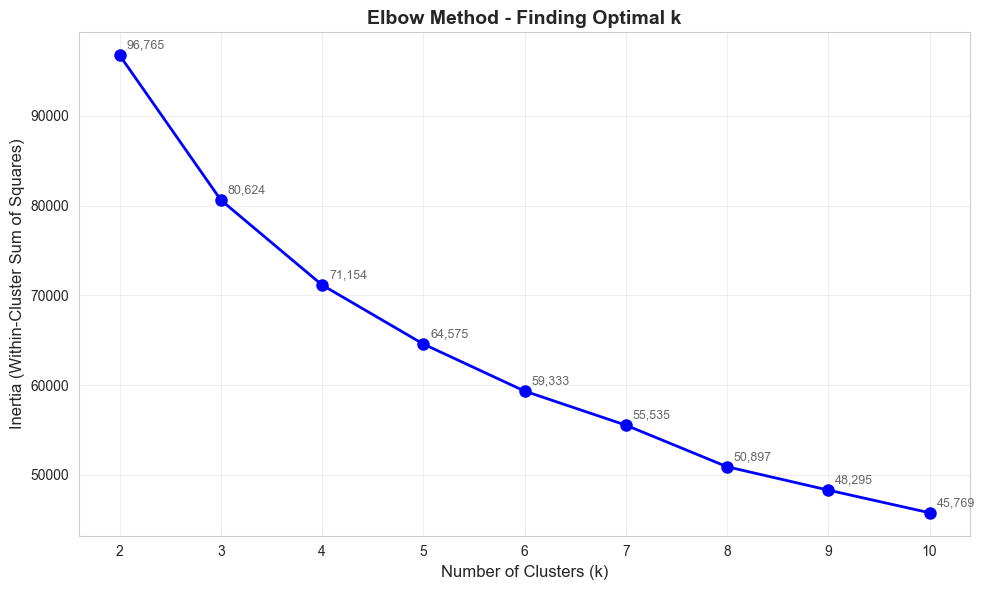


Elbow curve saved to: outputs/05_elbow_method.png


In [115]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Finding Optimal k', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)

# Add annotations
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    plt.annotate(f'{inertia:,.0f}', 
                xy=(k, inertia), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9,
                alpha=0.7)

plt.tight_layout()
plt.savefig('outputs/05_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nElbow curve saved to: outputs/05_elbow_method.png")

### Calculate Rate of Change (to identify the elbow more clearly)

In [116]:
# Calculate the rate of decrease in inertia
inertia_diff = []
for i in range(1, len(inertias)):
    diff = inertias[i-1] - inertias[i]
    pct_change = (diff / inertias[i-1]) * 100
    inertia_diff.append((list(K_range)[i], diff, pct_change))

print("Rate of Inertia Decrease:")
print("="*60)
print(f"{'k':<5} {'Decrease':<15} {'% Change':<15}")
print("="*60)
for k, diff, pct in inertia_diff:
    print(f"{k:<5} {diff:<15,.2f} {pct:<15.2f}%")

print("\nInterpretation: Look for the k where the % change drops significantly.")
print("This is your 'elbow' - the point of diminishing returns.")

Rate of Inertia Decrease:
k     Decrease        % Change       
3     16,141.28       16.68          %
4     9,469.12        11.74          %
5     6,579.80        9.25           %
6     5,242.05        8.12           %
7     3,797.33        6.40           %
8     4,637.80        8.35           %
9     2,602.87        5.11           %
10    2,525.72        5.23           %

Interpretation: Look for the k where the % change drops significantly.
This is your 'elbow' - the point of diminishing returns.


---

## Phase E: Train KMeans Model and Profile Clusters

**Decision: Using k=5 clusters** based on elbow method analysis

### 1. Train Final KMeans Model

In [117]:
# Train KMeans with k=5
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_final.fit(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = kmeans_final.labels_

print(f"KMeans model trained with k={optimal_k}")
print(f"Inertia: {kmeans_final.inertia_:,.2f}")
print(f"\nCluster labels assigned to all {len(df)} customers")
print(f"\nCluster distribution:")
print(df["Cluster"].value_counts().sort_index())

KMeans model trained with k=5
Inertia: 64,574.60

Cluster labels assigned to all 8950 customers

Cluster distribution:
Cluster
0    3331
1    3828
2    1162
3      30
4     599
Name: count, dtype: int64


### 2. Calculate Cluster Centroids and Statistics

In [118]:
# Calculate cluster statistics
cluster_stats = df.groupby("Cluster")[selected_features].mean()

print("Cluster Centroids (Mean Values):")
print("="*100)
print(cluster_stats.round(2))

# Cluster sizes
cluster_sizes = df["Cluster"].value_counts().sort_index()
print("\n" + "="*100)
print("Cluster Sizes:")
print("="*100)
for cluster, size in cluster_sizes.items():
    pct = (size / len(df)) * 100
    print(f"Cluster {cluster}: {size:,} customers ({pct:.1f}%)")

Cluster Centroids (Mean Values):
         BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                 
0         650.27    1056.63            498.19                  558.77   
1        1172.16     252.47            197.91                   54.78   
2        4595.78     537.35            335.52                  201.93   
3        5567.14   24957.91          18186.88                 6771.03   
4        3074.59    5207.78           3255.04                 1953.78   

         CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
Cluster                                                           
0              133.28       4027.96   1171.36            468.17   
1              670.35       3216.08    944.92            654.93   
2             4641.62       7621.13   3676.56           1908.00   
3             1858.84      15570.00  25178.88           3475.06   
4              503.38       8635.56   4950.17        

### 3. Visualize Cluster Sizes

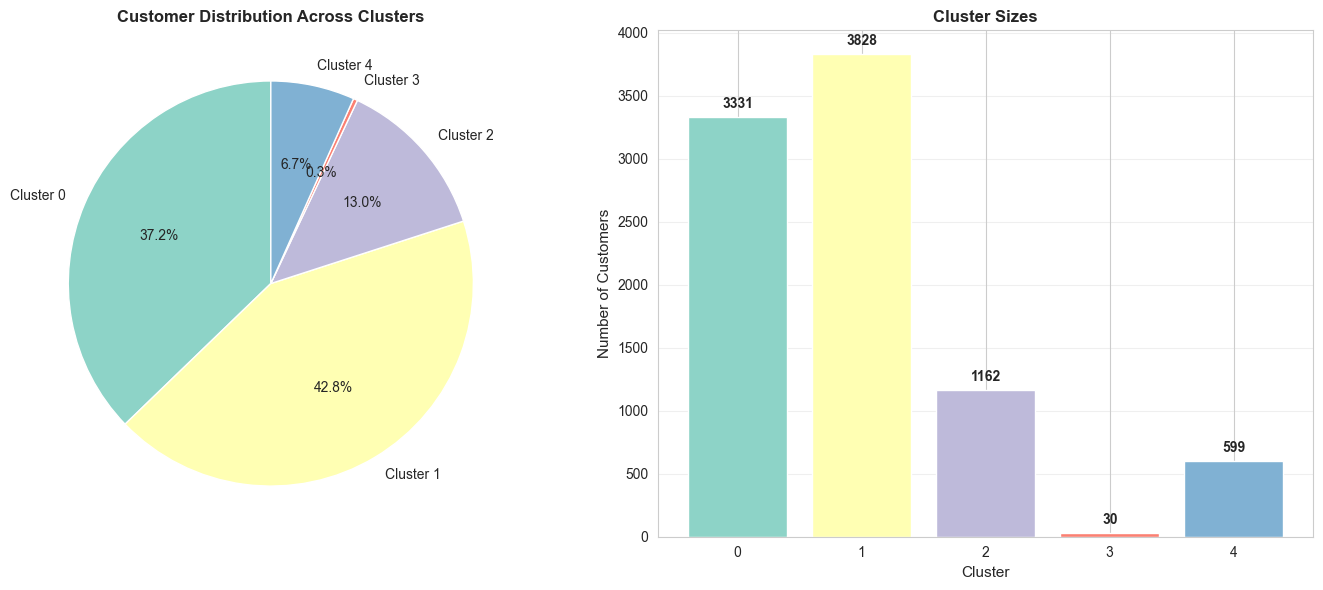

Cluster size visualization saved to: outputs/06_cluster_sizes.png


In [119]:
# Pie chart and bar chart of cluster distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
cluster_sizes = df["Cluster"].value_counts().sort_index()
axes[0].pie(cluster_sizes, labels=[f"Cluster {i}" for i in range(optimal_k)], 
           autopct="%1.1f%%", startangle=90, colors=plt.cm.Set3.colors)
axes[0].set_title("Customer Distribution Across Clusters", fontsize=12, fontweight="bold")

# Bar chart
axes[1].bar(range(optimal_k), cluster_sizes, color=plt.cm.Set3.colors)
axes[1].set_xlabel("Cluster", fontsize=11)
axes[1].set_ylabel("Number of Customers", fontsize=11)
axes[1].set_title("Cluster Sizes", fontsize=12, fontweight="bold")
axes[1].set_xticks(range(optimal_k))
axes[1].grid(True, alpha=0.3, axis="y")

# Add value labels on bars
for i, v in enumerate(cluster_sizes):
    axes[1].text(i, v + 50, str(v), ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.savefig("outputs/06_cluster_sizes.png", dpi=300, bbox_inches="tight")
plt.show()

print("Cluster size visualization saved to: outputs/06_cluster_sizes.png")

### 4. Compare Key Features Across Clusters

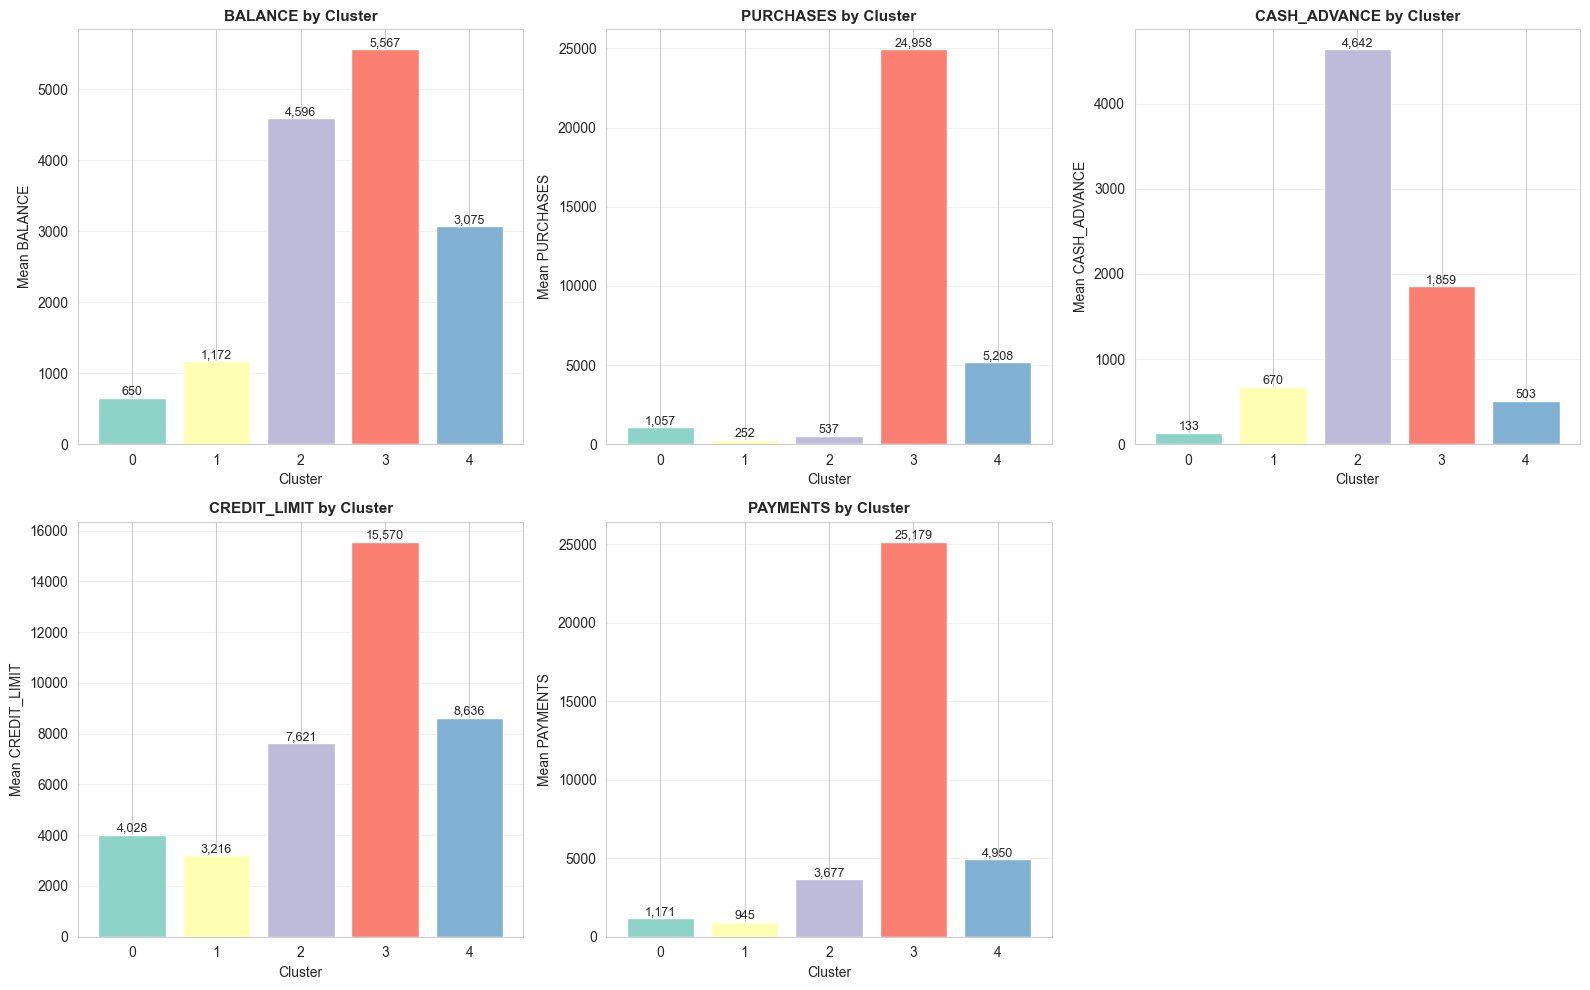

Feature comparison visualization saved to: outputs/07_features_by_cluster.png


In [120]:
# Compare key financial features across clusters
key_comparison_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_comparison_features):
    cluster_means = df.groupby("Cluster")[feature].mean()
    axes[idx].bar(range(optimal_k), cluster_means, color=plt.cm.Set3.colors)
    axes[idx].set_title(f"{feature} by Cluster", fontsize=11, fontweight="bold")
    axes[idx].set_xlabel("Cluster")
    axes[idx].set_ylabel(f"Mean {feature}")
    axes[idx].set_xticks(range(optimal_k))
    axes[idx].grid(True, alpha=0.3, axis="y")
    
    # Add value labels
    for i, v in enumerate(cluster_means):
        axes[idx].text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig("outputs/07_features_by_cluster.png", dpi=300, bbox_inches="tight")
plt.show()

print("Feature comparison visualization saved to: outputs/07_features_by_cluster.png")

### 5. Cluster Profiling - Detailed Analysis

Create detailed profiles for each cluster to understand customer segments

In [121]:
# Create comprehensive cluster profiles
print("="*100)
print("DETAILED CLUSTER PROFILES")
print("="*100)

for cluster in range(optimal_k):
    cluster_data = df[df["Cluster"] == cluster]
    size = len(cluster_data)
    pct = (size / len(df)) * 100
    
    print(f"\n" + "="*100)
    print(f"CLUSTER {cluster}: {size:,} customers ({pct:.1f}% of total)")
    print("="*100)
    
    # Financial behavior
    print(f"\nFinancial Profile:")
    print(f"  Average Balance:           ${cluster_data['BALANCE'].mean():>12,.2f}")
    print(f"  Average Purchases:         ${cluster_data['PURCHASES'].mean():>12,.2f}")
    print(f"  Average Cash Advance:      ${cluster_data['CASH_ADVANCE'].mean():>12,.2f}")
    print(f"  Average Credit Limit:      ${cluster_data['CREDIT_LIMIT'].mean():>12,.2f}")
    print(f"  Average Payments:          ${cluster_data['PAYMENTS'].mean():>12,.2f}")
    print(f"  Average Minimum Payments:  ${cluster_data['MINIMUM_PAYMENTS'].mean():>12,.2f}")
    
    # Behavioral patterns
    print(f"\nBehavioral Patterns:")
    print(f"  Purchase Frequency:        {cluster_data['PURCHASES_FREQUENCY'].mean():>12.2f} (0-1 scale)")
    print(f"  Cash Advance Frequency:    {cluster_data['CASH_ADVANCE_FREQUENCY'].mean():>12.2f} (0-1 scale)")
    print(f"  Avg Purchase Transactions: {cluster_data['PURCHASES_TRX'].mean():>12.1f} per period")
    print(f"  Avg Cash Adv Transactions: {cluster_data['CASH_ADVANCE_TRX'].mean():>12.1f} per period")
    print(f"  Full Payment Rate:         {cluster_data['PRC_FULL_PAYMENT'].mean():>12.1%}")
    
    # Purchase behavior breakdown
    print(f"\nPurchase Breakdown:")
    print(f"  One-off Purchases:         ${cluster_data['ONEOFF_PURCHASES'].mean():>12,.2f}")
    print(f"  Installment Purchases:     ${cluster_data['INSTALLMENTS_PURCHASES'].mean():>12,.2f}")

print(f"\n" + "="*100)

DETAILED CLUSTER PROFILES

CLUSTER 0: 3,331 customers (37.2% of total)

Financial Profile:
  Average Balance:           $      650.27
  Average Purchases:         $    1,056.63
  Average Cash Advance:      $      133.28
  Average Credit Limit:      $    4,027.96
  Average Payments:          $    1,171.36
  Average Minimum Payments:  $      468.17

Behavioral Patterns:
  Purchase Frequency:                0.84 (0-1 scale)
  Cash Advance Frequency:            0.03 (0-1 scale)
  Avg Purchase Transactions:         19.0 per period
  Avg Cash Adv Transactions:          0.5 per period
  Full Payment Rate:                31.6%

Purchase Breakdown:
  One-off Purchases:         $      498.19
  Installment Purchases:     $      558.77

CLUSTER 1: 3,828 customers (42.8% of total)

Financial Profile:
  Average Balance:           $    1,172.16
  Average Purchases:         $      252.47
  Average Cash Advance:      $      670.35
  Average Credit Limit:      $    3,216.08
  Average Payments:          

---

## Phase F: Business Insights and Recommendations

### 1. Executive Summary

In [122]:
# Cluster names and summary
cluster_names = {
    0: "Active Shoppers",
    1: "Low Engagers / Cash Dependent",
    2: "High-Risk Cash Advance Users",
    3: "VIP / Premium Spenders",
    4: "Frequent High-Value Shoppers"
}

print("="*100)
print("CARDWISE CUSTOMER SEGMENTATION - EXECUTIVE SUMMARY")
print("="*100)
print(f"\nTotal Customers Analyzed: {len(df):,}")
print(f"Number of Segments: {optimal_k}")
print(f"Model Inertia: {kmeans_final.inertia_:,.2f}")

print("\n" + "="*100)
print("SEGMENT OVERVIEW")
print("="*100)

for cluster in range(optimal_k):
    size = len(df[df["Cluster"] == cluster])
    pct = (size / len(df)) * 100
    avg_purch = df[df["Cluster"] == cluster]["PURCHASES"].mean()
    avg_cash = df[df["Cluster"] == cluster]["CASH_ADVANCE"].mean()
    
    print(f"\nCluster {cluster}: {cluster_names[cluster]}")
    print(f"  Size: {size:,} customers ({pct:.1f}%)")
    print(f"  Avg Purchases: ${avg_purch:,.2f}")
    print(f"  Avg Cash Advance: ${avg_cash:,.2f}")

CARDWISE CUSTOMER SEGMENTATION - EXECUTIVE SUMMARY

Total Customers Analyzed: 8,950
Number of Segments: 5
Model Inertia: 64,574.60

SEGMENT OVERVIEW

Cluster 0: Active Shoppers
  Size: 3,331 customers (37.2%)
  Avg Purchases: $1,056.63
  Avg Cash Advance: $133.28

Cluster 1: Low Engagers / Cash Dependent
  Size: 3,828 customers (42.8%)
  Avg Purchases: $252.47
  Avg Cash Advance: $670.35

Cluster 2: High-Risk Cash Advance Users
  Size: 1,162 customers (13.0%)
  Avg Purchases: $537.35
  Avg Cash Advance: $4,641.62

Cluster 3: VIP / Premium Spenders
  Size: 30 customers (0.3%)
  Avg Purchases: $24,957.90
  Avg Cash Advance: $1,858.84

Cluster 4: Frequent High-Value Shoppers
  Size: 599 customers (6.7%)
  Avg Purchases: $5,207.78
  Avg Cash Advance: $503.38


### 2. Key Business Insights

In [123]:
print("="*100)
print("KEY BUSINESS INSIGHTS")
print("="*100)

print("\n1. CUSTOMER BASE COMPOSITION:")
print("   - 80% split between Active Shoppers (37%) and Low Engagers (43%)")
print("   - Only 0.3% (30 customers) are VIP")
print("   - 13% are high-risk cash advance users")

print("\n2. REVENUE OPPORTUNITIES:")
vip_total = df[df["Cluster"] == 3]["PURCHASES"].sum()
total_purch = df["PURCHASES"].sum()
vip_pct = (vip_total / total_purch) * 100
print(f"   - VIP segment generates {vip_pct:.1f}% of total purchase volume")

c4_total = df[df["Cluster"] == 4]["PURCHASES"].sum()
c4_pct = (c4_total / total_purch) * 100
print(f"   - High-Value Shoppers generate {c4_pct:.1f}% of purchases")

low_total = df[df["Cluster"] == 1]["PURCHASES"].sum()
low_pct = (low_total / total_purch) * 100
print(f"   - Low Engagers only generate {low_pct:.1f}% - huge potential!")

print("\n3. RISK MANAGEMENT:")
risk_bal = df[df["Cluster"] == 2]["BALANCE"].sum()
total_bal = df["BALANCE"].sum()
risk_pct = (risk_bal / total_bal) * 100
print(f"   - High-Risk segment holds {risk_pct:.1f}% of outstanding balance")

avg_full_pay = df[df["Cluster"] == 2]["PRC_FULL_PAYMENT"].mean()
print(f"   - Only {avg_full_pay:.1%} pay in full (default risk!)")

KEY BUSINESS INSIGHTS

1. CUSTOMER BASE COMPOSITION:
   - 80% split between Active Shoppers (37%) and Low Engagers (43%)
   - Only 0.3% (30 customers) are VIP
   - 13% are high-risk cash advance users

2. REVENUE OPPORTUNITIES:
   - VIP segment generates 8.3% of total purchase volume
   - High-Value Shoppers generate 34.7% of purchases
   - Low Engagers only generate 10.8% - huge potential!

3. RISK MANAGEMENT:
   - High-Risk segment holds 38.1% of outstanding balance
   - Only 3.9% pay in full (default risk!)


### 3. Marketing Recommendations by Segment

In [124]:
print("="*100)
print("TARGETED MARKETING STRATEGIES")
print("="*100)

print("\nCLUSTER 0: ACTIVE SHOPPERS (37.2%)")
print("-" * 80)
print("Goal: Increase spend per transaction, maintain engagement")
print("Strategies:")
print("  1. Launch loyalty rewards program")
print("  2. Offer 1-3% cashback on purchases")
print("  3. Partner with popular retailers")
print("  4. Promote premium card upgrades")

print("\nCLUSTER 1: LOW ENGAGERS (42.8%)")
print("-" * 80)
print("Goal: Convert to active purchasers, reduce default risk")
print("Strategies:")
print("  1. Re-engagement campaign with purchase bonuses")
print("  2. Financial education webinars")
print("  3. Targeted offers for essential spending")
print("  4. Payment reminders and autopay incentives")

print("\nCLUSTER 2: HIGH-RISK CASH ADVANCE USERS (13.0%)")
print("-" * 80)
print("Goal: Risk mitigation, prevent defaults")
print("Strategies (PRIORITY):")
print("  1. Immediate credit limit review")
print("  2. Debt consolidation loan offers")
print("  3. Financial counseling services")
print("  4. Restrict cash advance limits")

print("\nCLUSTER 3: VIP / PREMIUM SPENDERS (0.3%)")
print("-" * 80)
print("Goal: Maximize lifetime value, ensure retention")
print("Strategies (WHITE-GLOVE):")
print("  1. Dedicated account managers")
print("  2. Exclusive perks: lounge access, travel insurance")
print("  3. Premium rewards: 5%+ cashback")
print("  4. Invitation-only events")

print("\nCLUSTER 4: FREQUENT HIGH-VALUE SHOPPERS (6.7%)")
print("-" * 80)
print("Goal: Upgrade to VIP segment")
print("Strategies:")
print("  1. Upsell to premium card tier")
print("  2. Travel rewards program")
print("  3. 0% APR installment offers")
print("  4. Spending targets with milestone bonuses")

print("\n" + "="*100)

TARGETED MARKETING STRATEGIES

CLUSTER 0: ACTIVE SHOPPERS (37.2%)
--------------------------------------------------------------------------------
Goal: Increase spend per transaction, maintain engagement
Strategies:
  1. Launch loyalty rewards program
  2. Offer 1-3% cashback on purchases
  3. Partner with popular retailers
  4. Promote premium card upgrades

CLUSTER 1: LOW ENGAGERS (42.8%)
--------------------------------------------------------------------------------
Goal: Convert to active purchasers, reduce default risk
Strategies:
  1. Re-engagement campaign with purchase bonuses
  2. Financial education webinars
  3. Targeted offers for essential spending
  4. Payment reminders and autopay incentives

CLUSTER 2: HIGH-RISK CASH ADVANCE USERS (13.0%)
--------------------------------------------------------------------------------
Goal: Risk mitigation, prevent defaults
Strategies (PRIORITY):
  1. Immediate credit limit review
  2. Debt consolidation loan offers
  3. Financial cou

### 4. Conclusion and Next Steps

In [125]:
print("="*100)
print("CONCLUSION")
print("="*100)

print("\nThis K-Means clustering analysis successfully identified 5 distinct customer")
print("segments, revealing critical insights for CardWise business strategy.")

print("\nKEY TAKEAWAYS:")
print("  1. VIP segment (0.3%) drives disproportionate value - retention critical")
print("  2. 42.8% Low Engagers represent massive untapped revenue potential")
print("  3. 13% High-Risk users need immediate intervention to prevent losses")
print("  4. Clear behavioral patterns enable targeted marketing strategies")

print("\nRECOMMENDED PRIORITIES:")
print("  1. Protect VIP segment with dedicated managers and premium perks")
print("  2. Activate Low Engagers with targeted re-engagement campaigns")
print("  3. Mitigate risk through credit limit reviews for high-risk segment")
print("  4. Upgrade High-Value Shoppers to VIP status")
print("  5. Reward Active Shoppers with loyalty programs")

print("\n" + "="*100)
print("ANALYSIS COMPLETE")
print("="*100)
print(f"\n✓ {len(df):,} customers segmented into {optimal_k} actionable clusters")
print("✓ Strategic recommendations delivered")
print("✓ Business insights provided for each segment")
print("\nNext Steps: Present findings to executive team and begin implementation.")
print("\nDetailed recommendations saved in: outputs/Phase_F_Business_Recommendations.txt")

CONCLUSION

This K-Means clustering analysis successfully identified 5 distinct customer
segments, revealing critical insights for CardWise business strategy.

KEY TAKEAWAYS:
  1. VIP segment (0.3%) drives disproportionate value - retention critical
  2. 42.8% Low Engagers represent massive untapped revenue potential
  3. 13% High-Risk users need immediate intervention to prevent losses
  4. Clear behavioral patterns enable targeted marketing strategies

RECOMMENDED PRIORITIES:
  1. Protect VIP segment with dedicated managers and premium perks
  2. Activate Low Engagers with targeted re-engagement campaigns
  3. Mitigate risk through credit limit reviews for high-risk segment
  4. Upgrade High-Value Shoppers to VIP status
  5. Reward Active Shoppers with loyalty programs

ANALYSIS COMPLETE

✓ 8,950 customers segmented into 5 actionable clusters
✓ Strategic recommendations delivered
✓ Business insights provided for each segment

Next Steps: Present findings to executive team and begin i